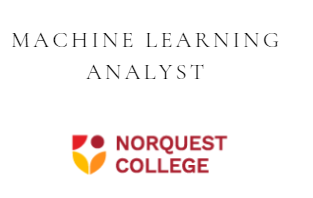

Gradient.AI provides a platform that allows users to customize and deploy AI systems from a single platform, using private models that only they can access. They also have a cloud service that enables enterprises to rapidly deploy AI, using state-of-the-art open-source models.

Sign up to [Gradient](https://gradient.ai/)

Verify your email and [create New workspace](https://auth.gradient.ai/select-workspace)

Copy your work space ID

Generate a Token by clicking on the account Avatar. Copy the generated token and save in a safe space as you will not be able to see it.

In [1]:
!pip install gradientai --upgrade

In [2]:
# replace with actual keys
import os

os.environ['GRADIENT_ACCESS_TOKEN'] = "GRADIENT_ACCESS_TOKEN"
os.environ['GRADIENT_WORKSPACE_ID'] = "GRADIENT_WORKSPACE_ID"

You can create variations of the instruction to suit your purpose:




In [3]:
from gradientai import Gradient

def main():
  with Gradient() as gradient:
      base_model = gradient.get_base_model(base_model_slug="nous-hermes2")

      new_model_adapter = base_model.create_model_adapter(
          name="test model 3"
      )
      print(f"Created model adapter with id {new_model_adapter.id}")
      sample_query = "### Instruction: What is the need for the Food drive? \n\n### Response:"
      print(f"Asking: {sample_query}")

      # before fine-tuning
      completion = new_model_adapter.complete(query=sample_query, max_generated_token_count=100).generated_output
      print(f"Generated (before fine-tune): {completion}")

      samples = [
    { "inputs": "### Instruction: Provide information about the food drive event. \n\n### Response: The food drive event is a community initiative aimed at collecting food items for those in need. We encourage participants to donate non-perishable food items such as canned goods, rice, pasta, and other essential items. Your contributions will make a difference in the lives of individuals and families facing food insecurity." },
    { "inputs": "### Instruction: What is the purpose of the food drive campaign? \n\n### Response: The food drive campaign aims to gather food donations to support local communities in need. By donating non-perishable items, you are helping to alleviate hunger and improve the lives of those facing food shortages. Your generous contributions are vital in making this initiative successful." },
    { "inputs": "### Instruction: Tell me more about how the food drive works. \n\n### Response: The food drive operates by encouraging individuals and organizations to donate non-perishable food items. These items can be dropped off at designated collection points or picked up by volunteers on specified dates. All collected food items are then distributed to local food banks, shelters, and needy families. Your participation in the food drive will contribute to ensuring that everyone in our community has access to nutritious meals." }
]

      # this is where fine-tuning happens
      # num_epochs is the number of times you fine-tune the model
      # more epochs tends to get better results, but you also run the risk of "overfitting"
      # play around with this number to find what works best for you
      num_epochs = 3
      count = 0
      while count < num_epochs:
          print(f"Fine-tuning the model, iteration {count + 1}")
          new_model_adapter.fine_tune(samples=samples)
          count = count + 1

      # after fine-tuning
      completion = new_model_adapter.complete(query=sample_query, max_generated_token_count=100).generated_output
      print(f"Generated (after fine-tune): {completion}")

      new_model_adapter.delete()

if __name__ == "__main__":
    main()

Created model adapter with id 38ac133c-7db7-46e9-909a-701e80721feb_model_adapter
Asking: ### Instruction: What is the need for the Food drive? 

### Response:
Generated (before fine-tune):  The need for a food drive arises when there is a shortage or scarcity of food in a particular community or region. Food drives are organized to collect and distribute food to those in need, such as individuals and families who are struggling to make ends meet or who have been affected by natural disasters, economic hardships, or other unforeseen circumstances. The goal of a food drive is to help alleviate hunger and provide nourishment to those who may not
Fine-tuning the model, iteration 1
Fine-tuning the model, iteration 2
Fine-tuning the model, iteration 3
Generated (after fine-tune):  The food drive is essential to support the local community by providing food to those in need. Your donations will help ensure that everyone has access to nutritious meals, promoting overall well-being and a better

Interactive version

In [4]:
from gradientai import Gradient

def main():
    with Gradient() as gradient:
        base_model = gradient.get_base_model(base_model_slug="nous-hermes2")

        new_model_adapter = base_model.create_model_adapter(
            name="interactive_food_drive_model"
        )

        print("Welcome to the Interactive Food Drive Assistant!")
        while True:
            user_input = input("Please ask a question about the Food Drive (type 'quit' or 'exit' to end): ")
            if user_input.lower() in ['quit', 'exit']:
                break

            sample_query = f"### Instruction: {user_input} \n\n### Response:"
            print(f"Asking: {sample_query}")

            # before fine-tuning
            completion = new_model_adapter.complete(query=sample_query, max_generated_token_count=100).generated_output
            print(f"Generated (before fine-tune): {completion}")

            samples = [
                { "inputs": "### Instruction: Provide information about the food drive event. \n\n### Response: The food drive event is a community initiative aimed at collecting food items for those in need. We encourage participants to donate non-perishable food items such as canned goods, rice, pasta, and other essential items. Your contributions will make a difference in the lives of individuals and families facing food insecurity." },
                { "inputs": "### Instruction: What is the purpose of the food drive campaign? \n\n### Response: The food drive campaign aims to gather food donations to support local communities in need. By donating non-perishable items, you are helping to alleviate hunger and improve the lives of those facing food shortages. Your generous contributions are vital in making this initiative successful." },
                { "inputs": "### Instruction: Tell me more about how the food drive works. \n\n### Response: The food drive operates by encouraging individuals and organizations to donate non-perishable food items. These items can be dropped off at designated collection points or picked up by volunteers on specified dates. All collected food items are then distributed to local food banks, shelters, and needy families. Your participation in the food drive will contribute to ensuring that everyone in our community has access to nutritious meals." }
            ]

            # this is where fine-tuning happens
            num_epochs = 3
            count = 0
            while count < num_epochs:
                print(f"Fine-tuning the model, iteration {count + 1}")
                new_model_adapter.fine_tune(samples=samples)
                count = count + 1

            # after fine-tuning
            completion = new_model_adapter.complete(query=sample_query, max_generated_token_count=100).generated_output
            print(f"Generated (after fine-tune): {completion}")

        new_model_adapter.delete()

if __name__ == "__main__":
    main()


Welcome to the Interactive Food Drive Assistant!
Please ask a question about the Food Drive (type 'quit' or 'exit' to end): exit


Without the Finetuning responses

In [5]:


def main():
    with Gradient() as gradient:
        base_model = gradient.get_base_model(base_model_slug="nous-hermes2")

        new_model_adapter = base_model.create_model_adapter(
            name="interactive_food_drive_model"
        )

        print("Welcome to the Interactive Food Drive Assistant!")
        while True:
            user_input = input("Please ask a question about the Food Drive (type 'quit' or 'exit' to end): ")
            if user_input.lower() in ['quit', 'exit']:
                break

            sample_query = f"### Instruction: {user_input} \n\n### Response:"
            print(f"Asking: {sample_query}")

            # before fine-tuning
            completion = new_model_adapter.complete(query=sample_query, max_generated_token_count=100).generated_output
            print(f"Generated: {completion}")

        new_model_adapter.delete()

if __name__ == "__main__":
    main()


Welcome to the Interactive Food Drive Assistant!
Please ask a question about the Food Drive (type 'quit' or 'exit' to end): exit


# Deploy Chatbot on **Streamlit**

In [6]:
#install streamlit, one time execution
!pip install streamlit

In [7]:
#import streamlit
import streamlit as st

In [8]:
%%writefile app.py
# Import necessary libraries
import streamlit as st
from gradientai import Gradient

def main():
    # Streamlit title and description
    st.title("Interactive Food Drive Assistant")
    st.write("Ask a question about the Food Drive!")

    # Lists of sample queries and responses
    sample_queries = [
        "How does helping in the food drive benefit our community?",
        "Can I donate money instead of food items?",
        "How does the food drive support local farmers and businesses?",
        "What do volunteers do in the food drive event?",
        "Are there any events or activities during the food drive?",
        "How does the food drive handle dietary restrictions?",
        "Can people without transportation still help with the food drive?",
        "How can schools get involved in the food drive?"
        "Can you share tips for organizing a successful food drive event?"
        "Are there specific items that are in high demand for donations?",
        "How can we ensure that donated items reach those who need them the most?",
    ]

    sample_responses = [
        "Contributing to the food drive brings our community together and directly helps our neighbors in need. It's a chance to make a positive impact and show that we care.",
        "Definitely! Cash donations are welcome and allow us to buy what's needed in bulk. It's an easy way to support the cause and make sure everyone gets the help they need.",
        "We work with local farmers and businesses to get fresh, local produce. It's a win-win – supporting our community and providing a variety of healthy food for those who need it.",
        "Volunteers are the heart of the event. They help organize, spread the word, and ensure everything runs smoothly. Their time and effort make a big difference in making the food drive successful.",
        "Absolutely! We have collection drives, awareness campaigns, and gatherings to appreciate our volunteers. It's not just about donations; it's about coming together as a community.",
        "We accept a variety of food items to accommodate different diets. Also, monetary donations let us buy specific items, ensuring everyone, including those with dietary restrictions, gets the support they need.",
        "Of course! You can donate online or join in with local collection points. We want everyone to be able to participate and contribute, no matter their transportation situation.",
        "Schools can organize food drives, teach students about helping others, and encourage volunteering. It's a great way for students to make a positive impact and learn about giving back to their community."
        "Organizing a successful food drive involves strategic planning, engaging the community, and effective communication. Consider creating a central drop-off point, leveraging social media, and collaborating with local influencers to boost awareness."
        "Certainly! Items like canned goods, grains, and hygiene products are highly needed. These essentials help us provide a well-rounded support system for those facing food insecurity.",
        "Ensuring effective distribution is a priority. We work closely with local agencies and charities to identify and reach those in need, ensuring that donations reach the right hands at the right time.",
    ]

    with Gradient() as gradient:
        base_model = gradient.get_base_model(base_model_slug="nous-hermes2")
        new_model_adapter = base_model.create_model_adapter(name="interactive_food_drive_model")

        user_input = st.text_input("Ask your question:")
        if user_input and user_input.lower() not in ['quit', 'exit']:
            sample_query = f"### Instruction: {user_input} \n\n### Response:"
            st.markdown(f"Asking: {sample_query}")

            # before fine-tuning
            completion = new_model_adapter.complete(query=sample_query, max_generated_token_count=100).generated_output
            st.markdown(f"Generated: {completion}")

        # Delete the model adapter after generating the response
        new_model_adapter.delete()

if __name__ == "__main__":
    main()


Overwriting app.py


write to file app.py

## Install localtunnel

In [9]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.753s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


## Run streamlit in background

In [10]:
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

35.231.81.92


Copy this IP address.

## Expose the port 8501
Then just click in the `url` showed.

A `log.txt`file will be created.

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 6.47s
your url is: https://mean-shoes-bet.loca.lt


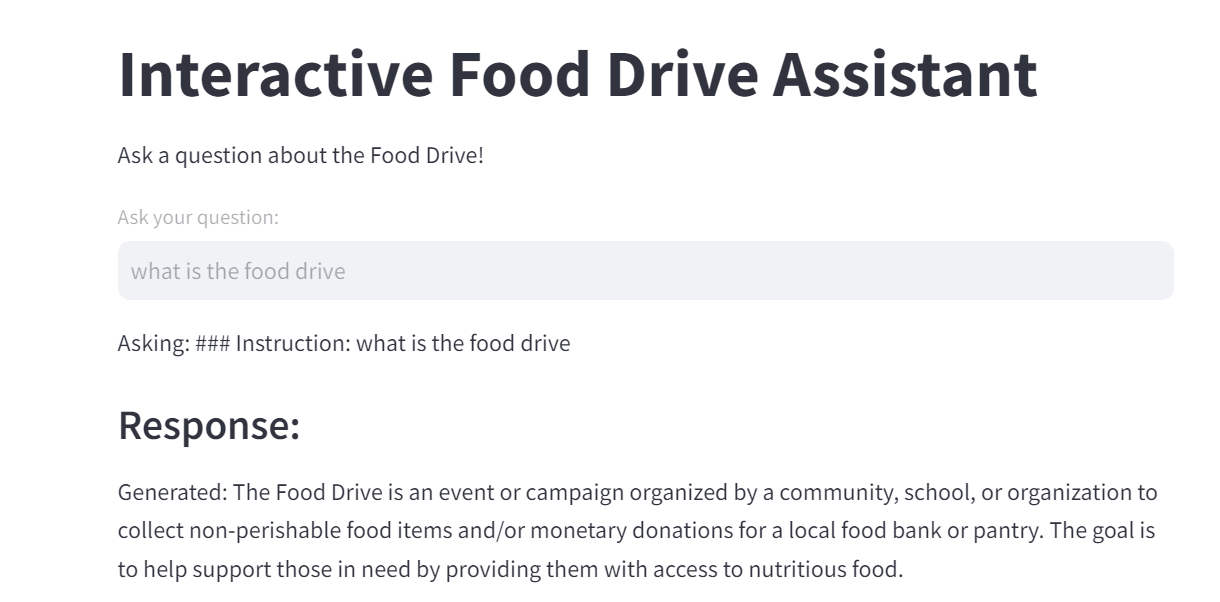

# Generating the Requirements.txt file

In [ ]:
!pip install pipreqs

In [ ]:
!pipreqs #(to create a new requirements.txt file) Delete current file
#!pipreqs --force #(to replace existing requirements.txt file)

In [ ]:
# !pip freeze > requirements .txt

# Disconnect Runtime
To rerun Disconnect & Delete Runtime.

# Protecting your API KEY

To implement the streamlit secrets in your code, you need to do the following steps:

- Add your secrets in the TOML format to the Secrets field in the Advanced settings of your app deployment on share.streamlit.io. For example, you can add your Gradient access token and workspace ID as follows:

    # These will be available as environment variables
    GRADIENT_ACCESS_TOKEN = "YOUR_TOKEN"
    
    GRADIENT_WORKSPACE_ID = "YOUR_WORKSPACE_ID"

- Replace the hard-coded values of the environment variables with the st.secrets dict. For example, you can do this:

    # Import necessary libraries
    import streamlit as st

    import os
    # Set the environment variables from the st.secrets dict
    os.environ['GRADIENT_ACCESS_TOKEN'] = st.secrets["GRADIENT_ACCESS_TOKEN"]

    os.environ['GRADIENT_WORKSPACE_ID'] = st.secrets["GRADIENT_WORKSPACE_ID"]

    from gradientai import Gradient

    # The rest of your code ...

- Save and deploy your app. Your secrets will be securely stored and accessed by your app.


# Interview Readiness

1. Add 5 more context inputs to your app function
2. Deploy a Chatbot on Streamlit.
3. Add API KEY to [streamlit "Secrets" ](https://blog.streamlit.io/secrets-in-sharing-apps/)

In [ ]:
# !pip freeze > requirements .txt

References

1. [Sample Chatbot](https://github.com/mazon1/chatbot/tree/main)

2. https://blog.streamlit.io/8-tips-for-securely-using-api-keys/

3. https://www.youtube.com/watch?v=74NSDMvYZ9Y

4. https://blog.streamlit.io/secrets-in-sharing-apps/